In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import operator
from scipy.optimize import minimize
import math

In [42]:
def gen_dx(mu_real,sig_real,dt,N):
    N=np.int64(N)
    dW=np.sqrt(dt)*np.random.normal(0, 1, N)
    e= mu_real*dt+ sig_real*dW
    return(e)

In [43]:
def liklihood(param,data, disc):
    L=0
    e=data
    N,dt=disc;
    N=np.int64(N)
    mu,sig =param;
    for i in range(0,N):
        L = L  - (e[i]-mu*dt )**2/(2*dt*sig**2) -0.5*np.log(2*math.pi*sig**2*dt)
    return(-1*L)

In [54]:
def gen_paths(mu_real,sig_real,dt,N,num_paths=1):
    L = np.zeros((num_paths,N))
    for i in range(0,num_paths):
        L[i]=gen_dx(mu_real,sig_real,dt,N)
    return(L)

In [62]:
def covergence_test(disc ,param_real, param_initial):
    
    N,dt=disc;
    mu_real,sig_real=param_real
    mu_initial,sig_initial=param_initial
    
    e=gen_dx(mu_real,sig_real,dt,N)
    
    args=(e,disc)
    x0=param_initial
    bnds = ((None, None), (1e-5, None))
    
    min_param=minimize(liklihood,x0,args,bounds=bnds);min_param
    #min_param=minimize(liklihood,x0,args,method='SLSQP',bounds=bnds,\
                   #tol=1e-24,options={  'ftol': 1e-24,  'eps': 1e-12});min_param
    error = np.divide ( abs(min_param.x - param_real),param_real )
    
    
    
    return(min_param.x, error)

In [89]:
#varying number of samples

def convergence_in_N(N_test,fix_dt,param_real_test,param_initial_test):

    err_fixeddt=np.zeros((len(N_test),2))
    result_fixeddt=np.zeros((len(N_test),2))

    for i in range(0,len(N_test)):
        disc_test=np.array([N_test[i],fix_dt])
        result_fixeddt[i,:],err_fixeddt[i,:]=covergence_test(disc_test,param_real_test,param_initial_test)
        
    return(result_fixeddt,err_fixeddt)

In [119]:
#varying number of paths

def convergence_in_L(N_test,fix_dt,param_real_test,param_initial_test,num_paths ):
    result_fixeddt= np.zeros(( num_paths ,len(N_test),2))
    err_fixeddt= np.zeros(( num_paths ,len(N_test),2))

    for i in range(0,num_paths):

        result_fixeddt[i,:,:],err_fixeddt[i,:,:]=convergence_in_N(N_test,fix_dt,param_real_test,param_initial_test)
    return(result_fixeddt, err_fixeddt)

In [134]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label='slope='+str(slope))

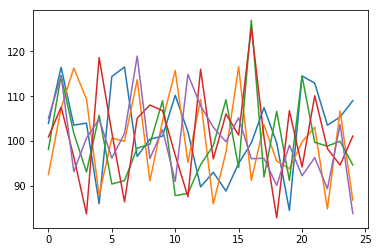

In [112]:
#dX paths plot only, not used for computation

param_real_test=np.array([100,10])
disc_test=np.array([25,1])

N,dt=disc_test;
mu_real,sig_real=param_real_test
num_paths=5

L=gen_paths(mu_real,sig_real,dt,N,num_paths)

for i in range(0,num_paths):
    plt.plot(L[i])

In [129]:
#convergence for increasing number of paths and samples

N_test=np.array([10,50,100,500,1000,5000]) #10000,50000
fix_dt=1
param_real_test=np.array([100,10])
param_initial_test= np.array([13,7])

num_paths_test=np.array([5,10,100,1000])


result_fixeddt_avg=np.zeros((len(num_paths_test),len(N_test),2))
err_fixeddt_avg=np.zeros((len(num_paths_test),len(N_test),2))

for i in range(0,len(num_paths_test)):
    result_fixeddt,err_fixeddt=convergence_in_L(N_test,fix_dt,param_real_test,param_initial_test,num_paths_test[i] )
    result_fixeddt_avg[i]=np.average(result_fixeddt, axis=0)
    err_fixeddt_avg[i]=np.average(err_fixeddt, axis=0)


In [147]:
err_fixeddt_avg[1,:]

array([[0.02175707, 0.25019983],
       [0.01144879, 0.10059039],
       [0.00879367, 0.04826992],
       [0.00302679, 0.02062206],
       [0.00268368, 0.01190224],
       [0.00155287, 0.00854926]])

In [150]:
err_fixeddt_avg[0,:,0]

array([0.02606579, 0.00915775, 0.00456668, 0.00618944, 0.00122536,
       0.00130587])

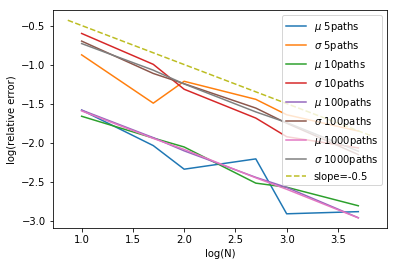

In [155]:
plt.title('')
plt.xlabel('log(N)')
plt.ylabel('log(relative error)')
for i in range(0, len(num_paths_test)):
    mu_label='$\mu$ '+ str(num_paths_test[i]) +'paths'
    sig_label='$\sigma$ '+ str(num_paths_test[i]) +'paths'
    plt.plot(np.log10(N_test),  np.log10(err_fixeddt_avg[i,:,0]), label=mu_label)
    plt.plot(np.log10(N_test),  np.log10(err_fixeddt_avg[i,:,1]) , label=sig_label)
abline(-0.5,0)
plt.legend()
plt.savefig('multi_path.pdf')

In [ ]:
plt.title('')
plt.xlabel('log(N)')
plt.ylabel('log(relative error)')
for i in range(0, len(num_paths_test)):
    mu_label='$\mu$ '+ str(num_paths_test[i]) +'paths'
    sig_label='$\sigma$ '+ str(num_paths_test[i]) +'paths'
    plt.plot(np.log10(N_test),  np.log10(err_fixeddt_avg[i,:,0]), label=mu_label)
    plt.plot(np.log10(N_test),  np.log10(err_fixeddt_avg[i,:,1]) , label=sig_label)
abline(-0.5,0)
plt.legend()
plt.savefig('multi_path.pdf')


5000000

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(N_test, num_paths_test, err, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
